You can get data the same way we did in bash. To run any bash command in a Jupyter notebook simply preface the command with !

In [4]:
!curl -O http://rachelss.github.io/Bioinformatics/sample.fastq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21190  100 21190    0     0   105k      0 --:--:-- --:--:-- --:--:--  110k


Run the bash command to list files in the current folder to check it's there

In [ ]:
!ls

You can also use the `listdir` function in the `os` package to do the same thing. Notice that this generates a list. Because we've imported the function from the package rather than the whole package we use `listdir()` rather than `os.listdir()`.

In [ ]:
from os import listdir
listdir()

Specify the file using a string variable  
Open the file  
Read it into memory, line by line  
This creates a list where each line is an item in that list

In [7]:
filename = 'sample.fastq'
f = open(filename,'r')
fastq = f.readlines()

To show the contents of the list we can type

In [ ]:
print(fastq)

Let's not do that - it could be a very long list  
Instead, let's print the first item

In [9]:
print(fastq[0])

@read0



Notice the first item is actually given as 0

Now let's look at the first few lines  
In python you can specify the items in the list you want    
In this case we'll get 0 (the first line is 0) up to (but not including) line 10  

In [10]:
fastq[0:10]

['@read0\n',
 'TTCACCGTGATACCGCTTGATCTACGACCGTGCATGAAGACCGCCAATGCTAAGCTCAACGAGGTCCGACCGACGAAGAACTCGTGGACTAAAAATAGCT\n',
 '+\n',
 'IM40#d5SUo"UazxA!zdcs%nDm1I%3wlAxqy9qgcDZQ#pfeH05Jy$zhZoMgEgDnHW7"sR0fuQF#Zvu!S3"lmrm8"I#pq9ZD4vv1x!\n',
 '@read1\n',
 'TTCCTTGGATGAAAAAAAAGGAGCGAACGGCCTTTTAGCGAGTAACCGGGTCGCTCGGTCAGTTGAGGCAAACTTCATCACTCGATAGGGGTGTCCGAAT\n',
 '+\n',
 'ifl!9hXKU"bSGVUTye67v1JLT24$9InzAj04X5P#RlIjQ8W"ZveC3YhDRPf%Dqlvx7"LQ5gY2komek0wX5Cy62BF5p9MUnQeKbGX\n',
 '@read2\n',
 'GTCACTGCCCATGGGAAGACCACTGAAGTCCTCACACGGCCAGGCCCGTGTGGAATTCCGAATCTCAGAAGGATGATGTCCGGTTCGTGGTAGTTTGTAG\n']

Notice each line is its own item in the list  
Also the fastq file contains more than just the sequence  
The sequencer stores the name of the read and the quality of each base  

Let's find just the sequences - that's the 2nd line (item 1) and every fourth line after that

In [11]:
print(fastq[1])
print(fastq[5])
print(fastq[9])

TTCACCGTGATACCGCTTGATCTACGACCGTGCATGAAGACCGCCAATGCTAAGCTCAACGAGGTCCGACCGACGAAGAACTCGTGGACTAAAAATAGCT

TTCCTTGGATGAAAAAAAAGGAGCGAACGGCCTTTTAGCGAGTAACCGGGTCGCTCGGTCAGTTGAGGCAAACTTCATCACTCGATAGGGGTGTCCGAAT

GTCACTGCCCATGGGAAGACCACTGAAGTCCTCACACGGCCAGGCCCGTGTGGAATTCCGAATCTCAGAAGGATGATGTCCGGTTCGTGGTAGTTTGTAG



## Challenge: what characterizes the lines with the sequences?

Reads are on lines where:  
the line number = 1+4n  
or: if line number / 4 leaves a remainder of 1  
in python we use % (modulo) to specify the remainder

In [12]:
print(1%4)
print(5%4)

1
1


Let's go through each line in the file (we'll limit it to the first 20)

Remember for loops in shell? It's easier in python

In [13]:
for line in fastq[0:20]:
    pass

pass lets us run the loops without throwing an error or doing anything inside the loop

In the last loop we got the item in the line, but not the line number  
Let's also include the line number using "enumerate" so we can find our sequences

In [14]:
for line_num,line in enumerate(fastq[0:20]):
    pass

Now we can print each sequence by checking that it's a sequence line using modulo  
note we're using an if statement

In [15]:
for line_num,line in enumerate(fastq[0:20]):
    #if line number / 4 leaves a remainder of 1
    if line_num%4 == 1:
        print(line)

TTCACCGTGATACCGCTTGATCTACGACCGTGCATGAAGACCGCCAATGCTAAGCTCAACGAGGTCCGACCGACGAAGAACTCGTGGACTAAAAATAGCT

TTCCTTGGATGAAAAAAAAGGAGCGAACGGCCTTTTAGCGAGTAACCGGGTCGCTCGGTCAGTTGAGGCAAACTTCATCACTCGATAGGGGTGTCCGAAT

GTCACTGCCCATGGGAAGACCACTGAAGTCCTCACACGGCCAGGCCCGTGTGGAATTCCGAATCTCAGAAGGATGATGTCCGGTTCGTGGTAGTTTGTAG

TTTTCTCTCGCTAGAAAAGTGGTCTAGTCTCAACTCGAAATGGTACGTTTGTTTGTTCCGCCGAGCTTGCGCAGTCTCCTCTAGGTGGCTATGGCGGGTC

ATTAATGGTAACCAATTAGAGACAAGCCCCTTACATTGGCACGGGTACGCGCGTATACTAGCGTTAGCGGACCCGTTAGACCACTTCGATATTTGATTCA



Now that we can get our sequence data and we can look for patterns  
The first pattern is just to count the number of each base  
Before we can count them, we need to access each base

## Challenge: add a line to iterate over each base in the line
use a subset of your data to check that you are getting the expected results

In [16]:
for line_num,line in enumerate(fastq[0:20]):
    if line_num%4 == 1:
        for base in line:
            pass

Now we can access each base  
Let's check if it's an 'A' using an if statement

In [17]:
for line_num,line in enumerate(fastq[0:20]):
    if line_num%4 == 1:
        for base in line:
            if base == 'A':
                pass

Now let's count all the A's  
We specify a variable for counting  
When we're done we print the number in the acounter variable

In [18]:
acounter = 0
for line_num,line in enumerate(fastq):
    if line_num%4 == 1:
        for base in line:
            if base == 'A':
                acounter = acounter+1
print(acounter)   

2517


## Challenge: now count each of the bases

In [19]:
acounter = 0
ccounter = 0
gcounter = 0
tcounter = 0
for line_num,line in enumerate(fastq):
    if line_num%4 == 1:
        for base in line:
            if base == 'A':
                acounter = acounter+1
            if base == 'C':
                ccounter = ccounter+1
            if base == 'G':
                gcounter = gcounter+1
            if base == 'T':
                tcounter = tcounter+1
print(acounter, ccounter, gcounter, tcounter)

2517 2550 2489 2444


That works, but it only works because we know our four bases  
Even then, it's a lot of typing or copy / paste  
That's prone to error  
## Challenge: now count each of the bases using just one variable

In [20]:
counter = [0,0,0,0]
for line_num,line in enumerate(fastq):
    if line_num%4 == 1:
        for base in line:
            if base == 'A':
                counter[0] = counter[0]+1
            if base == 'C':
                counter[1] = counter[1]+1
            if base == 'G':
                counter[2] = counter[2]+1
            if base == 'T':
                counter[3] = counter[3]+1
print(counter)

[2517, 2550, 2489, 2444]


Note we're checking each base four times so even if it's an 'A' we're still checking whether it's a 'C', etc.  
Let's expand our if statement to  
if, else if (elif), and else

In [21]:
counter = [0,0,0,0]
for line_num,line in enumerate(fastq):
    if line_num%4 == 1:
        for base in line:
            if base == 'A':
                counter[0] = counter[0]+1
            elif base == 'C':
                counter[1] = counter[1]+1
            elif base == 'G':
                counter[2] = counter[2]+1
            elif base == 'T':
                counter[3] = counter[3]+1
print(counter)

[2517, 2550, 2489, 2444]


That's better: we only have one variable instead of four  
But we're still checking each base individually  
In a minute, we're going to count 2-base patterns  
e.g. how many 'AA' or 'AT' - there are 16 of those

We've used strings and lists, now we will use a data structure called a dictionary, which looks like  
word: definition  
word2: definition2  
word3: definition3  
word4: definition4  

Let's do this for our data, where the "word" is the base, and the "definition" is our count

In [22]:
{'A':0,
'C':0,
'G':0,
'T':0}

{'A': 0, 'C': 0, 'G': 0, 'T': 0}

In [23]:
counter = {'A':0,
'C':0,
'G':0,
'T':0}

print(counter)

{'A': 0, 'C': 0, 'G': 0, 'T': 0}


That doesn't look much different than our list  
However, notice that each count has a label  
As with a dictionary of words we can access our counts by the word  
We do this in the same format as for lists, except access is by name not position in the list

In [24]:
print(counter['A'])

0


Let's go back to our pattern counting - now using a dictionary

In [25]:
counter={'A':0,'C':0,'G':0,'T':0}
for line_number,line in enumerate(fastq):
    if line_number%4 == 1:
        for base in line:
            counter[base] = counter[base] + 1
            
print(counter)

KeyError: '\n'

Oops - we have an error - the key is the thing we're trying to look up in the dictionary  
In this case it's a newline character  
You can see it when you print part of the list

In [26]:
print(fastq[0:1])

['@read0\n']


We need to "strip" the newline from each line  
For example

In [27]:
for line in fastq[0:2]:
    print(line)
    print(line.rstrip())

@read0

@read0
TTCACCGTGATACCGCTTGATCTACGACCGTGCATGAAGACCGCCAATGCTAAGCTCAACGAGGTCCGACCGACGAAGAACTCGTGGACTAAAAATAGCT

TTCACCGTGATACCGCTTGATCTACGACCGTGCATGAAGACCGCCAATGCTAAGCTCAACGAGGTCCGACCGACGAAGAACTCGTGGACTAAAAATAGCT


In [28]:
counter={'A':0,'C':0,'G':0,'T':0}
for line_number,line in enumerate(fastq):
    #if it's a sequencing read: if it's line 1+4n: if line number / 4 leaves a remainder of 1
    if line_number%4==1:
        line=line.rstrip()
        for base in line:
            counter[base]+=1
            
print(counter)

{'A': 2517, 'C': 2550, 'G': 2489, 'T': 2444}


Now we can count the number of each base  

## Challenge: modify the script to count each pair of bases e.g. 'CG'  
hint: first modify your script to access the base by its position

### Common difficulties with this challenge:  
How do you get the two-base string?  
- Did you add the current base to the next base?
- Do you use the index of the current base to access a range of bases in the line? Did you remember ranges are non-inclusive?  

How do you handle the last base in the line, which has no next base?

## Challenge: Count pairs of bases assuming you don't know in advance the possible pairs  
i.e. the dictionary should start out empty

### Common difficulties with this challenge:  
How to check if a "key" is in the dictionary  
How to insert a new "key":"value" pair in the dictionary

## Challenge: Make it possible to count kmers of any length by changing the value of a variable

In [46]:
counter={}
k=2
for line_number,line in enumerate(fastq):
    #if it's a sequencing read: if it's line 1+4n: if line number / 4 leaves a remainder of 1
    if line_number%4==1:
        line=line.rstrip()
        for i,base in enumerate(line[:-k+1]):
            kmer = line[i:i+k]
            if kmer in counter:
                counter[kmer]+=1
            else:
                counter[kmer]=1
            
print(counter)

{'TT': 583, 'TC': 615, 'CA': 638, 'AC': 665, 'CC': 630, 'CG': 623, 'GT': 627, 'TG': 628, 'GA': 633, 'AT': 574, 'TA': 588, 'GC': 620, 'CT': 636, 'AA': 632, 'AG': 627, 'GG': 581}


In [113]:
counter={}
k=2
for line_number,line in enumerate(fastq):
    #if it's a sequencing read: if it's line 1+4n: if line number / 4 leaves a remainder of 1
    if line_number%4==1:
        line=line.rstrip()
        for i,base in enumerate(line):
            kmer = line[i:i+k]
            if kmer in counter:
                counter[kmer]+=1
            else:
                assert len(kmer) == k, "Trying to add incorrect kmer: "+kmer+" from line "+ str(line_number) + " position "+str(i)
                counter[kmer]=1
            
print(counter)

AssertionError: Trying to add incorrect kmer: T from line 1 position 99

Up to this point we have specified the file we want to work with. To have python look for fastq files use the `glob` package.

In [45]:
import glob
filelist = glob.glob('*fastq')
print(filelist)

['sample.fastq']


Use a loop to read the each file in your list of files of interest

In [49]:
counter={}
k=2
for filename in glob.glob('*fastq'):
    f = open(filename,'r')
    fastq = f.readlines()
    for line_number,line in enumerate(fastq):
        #if it's a sequencing read: if it's line 1+4n: if line number / 4 leaves a remainder of 1
        if line_number%4==1:
            line=line.rstrip()
            for i,base in enumerate(line[:-k+1]):
                kmer = line[i:i+k]
                if kmer in counter:
                    counter[kmer]+=1
                else:
                    counter[kmer]=1
            
print(counter)

{'TT': 583, 'TC': 615, 'CA': 638, 'AC': 665, 'CC': 630, 'CG': 623, 'GT': 627, 'TG': 628, 'GA': 633, 'AT': 574, 'TA': 588, 'GC': 620, 'CT': 636, 'AA': 632, 'AG': 627, 'GG': 581}


Let's convert this to a function and reorganize

In [73]:
def count_kmers(k,fastq,counter={}):
    for line_number,line in enumerate(fastq):
    #if it's a sequencing read: if it's line 1+4n: if line number / 4 leaves a remainder of 1
        if line_number%4==1:
            line=line.rstrip()
            for i,base in enumerate(line[:-k+1]):
                kmer = line[i:i+k]
                if kmer in counter:
                    counter[kmer]+=1
                else:
                    counter[kmer]=1
    return(counter)

counter={}
k=3
for filename in glob.glob('*fastq'):
    f = open(filename,'r')
    fastq = f.readlines()
    counter = count_kmers(k,fastq,counter)
print(counter)
print('Number of kmers: ',len(counter))
print('Number of possible kmers: ',4**k)

{'TTC': 148, 'TCA': 139, 'CAC': 168, 'ACC': 165, 'CCG': 155, 'CGT': 143, 'GTG': 166, 'TGA': 165, 'GAT': 148, 'ATA': 139, 'TAC': 154, 'CGC': 162, 'GCT': 140, 'CTT': 132, 'TTG': 136, 'ATC': 139, 'TCT': 147, 'CTA': 156, 'ACG': 144, 'CGA': 169, 'GAC': 163, 'TGC': 152, 'GCA': 154, 'CAT': 150, 'ATG': 144, 'GAA': 166, 'AAG': 154, 'AGA': 145, 'GCC': 157, 'CCA': 166, 'CAA': 144, 'AAT': 142, 'TAA': 155, 'AGC': 156, 'CTC': 163, 'AAC': 174, 'GAG': 150, 'AGG': 145, 'GGT': 149, 'GTC': 159, 'TCC': 169, 'ACT': 175, 'TCG': 155, 'TGG': 153, 'GGA': 150, 'AAA': 158, 'TAG': 148, 'CCT': 169, 'GCG': 164, 'CGG': 147, 'GGC': 140, 'TTT': 149, 'TTA': 140, 'AGT': 176, 'GTA': 146, 'GGG': 133, 'CAG': 170, 'GTT': 148, 'TGT': 146, 'CTG': 178, 'CCC': 136, 'ACA': 172, 'ATT': 147, 'TAT': 128}
Number of kmers:  64
Number of possible kmers:  64


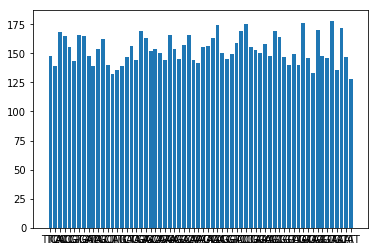

In [79]:
# plot frequencies
import matplotlib.pyplot as plt
%matplotlib inline

names = list(counter.keys())
values = list(counter.values())

plt.bar(range(len(counter)),values,tick_label=names);

      AAA  AAC  AAG  AAT  ACA  ACC  ACG  ACT  AGA  AGC ...   TCG  TCT  TGA  \
kmer  158  174  154  142  172  165  144  175  145  156 ...   155  147  165   

      TGC  TGG  TGT  TTA  TTC  TTG  TTT  
kmer  152  153  146  140  148  136  149  

[1 rows x 64 columns]


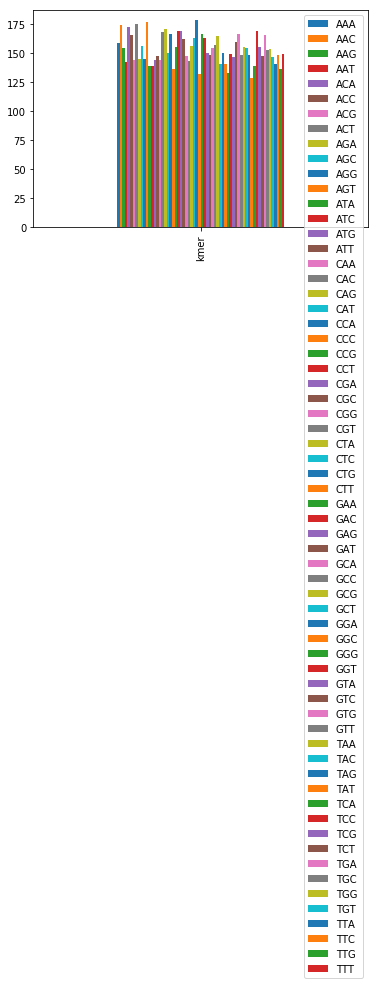

In [80]:
#Plot by converting to a data frame
import pandas
counter_df = pandas.DataFrame(counter, index=['kmer'])
print(counter_df)
counter_df.plot(kind='bar');

You can also plot with the seaborn package

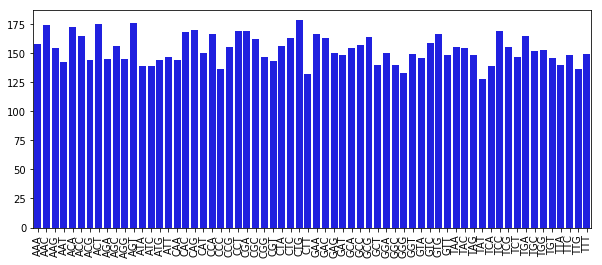

In [103]:
#!conda install seaborn
import seaborn as sns

plt.figure(figsize=(10,4)) #note using matplot lib to set figure size
g = sns.barplot(data=counter_df, color="b");
plt.xticks(rotation=90,); #and matplotlib again
plt.savefig('output.png')